<a href="https://colab.research.google.com/github/SUDHARSSHINI/DV/blob/main/Responsible_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.5 MB/s eta 0:00:00


In [4]:
# Load all necessary packages
import sys
sys.path.insert(1, "../")

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [5]:
import os
import urllib.request

# Create the directory if it doesn't exist
directory = '/content/aif360/data/raw/german'
os.makedirs(directory, exist_ok=True)

# URLs for the dataset files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
doc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'

# Download the dataset files
urllib.request.urlretrieve(data_url, os.path.join(directory, 'german.data'))
urllib.request.urlretrieve(doc_url, os.path.join(directory, 'german.doc'))

print("Download completed.")


Download completed.


In [6]:
import os
import urllib.request
import pandas as pd

# Create the directory if it doesn't exist
directory = '/content/aif360/data/raw/german'
os.makedirs(directory, exist_ok=True)

# URLs for the dataset files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
doc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'

# Download the dataset files
urllib.request.urlretrieve(data_url, os.path.join(directory, 'german.data'))
urllib.request.urlretrieve(doc_url, os.path.join(directory, 'german.doc'))

# Load the dataset
filepath = os.path.join(directory, 'german.data')
column_names = ["existing_checking", "duration", "credit_history", "purpose", "credit_amount", "savings", "employment", "installment_rate", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]
df = pd.read_csv(filepath, sep=' ', header=None, names=column_names)

# Display the first few rows of the dataset
df.head()


,existing_checking,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
import os
import urllib.request
import pandas as pd

# Create the directory if it doesn't exist
directory = '/content/aif360/data/raw/german'
os.makedirs(directory, exist_ok=True)

# URLs for the dataset files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
doc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'

# Download the dataset files
urllib.request.urlretrieve(data_url, os.path.join(directory, 'german.data'))
urllib.request.urlretrieve(doc_url, os.path.join(directory, 'german.doc'))

# Change the file path in the GermanDataset constructor
filepath = os.path.join(directory, 'german.data')

# Load the dataset
column_names = ["existing_checking", "duration", "credit_history", "purpose", "credit_amount", "savings", "employment", "installment_rate", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]
df = pd.read_csv(filepath, sep=' ', header=None, names=column_names)

# Display the first few rows of the dataset
df.head()


,existing_checking,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
import os
import urllib.request
import pandas as pd
from aif360.datasets import GermanDataset

# Create the directory if it doesn't exist
directory = '/usr/local/lib/python3.10/dist-packages/aif360/data/raw/german'
os.makedirs(directory, exist_ok=True)

# URLs for the dataset files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
doc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'

# Download the dataset files
urllib.request.urlretrieve(data_url, os.path.join(directory, 'german.data'))
urllib.request.urlretrieve(doc_url, os.path.join(directory, 'german.doc'))

# Load the dataset using AIF360 GermanDataset
dataset_orig = GermanDataset(protected_attribute_names=['age'],
                             privileged_classes=[lambda x: x >= 25],
                             features_to_drop=['personal_status', 'sex'])

# Split the dataset
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

# Define privileged and unprivileged groups
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]


In [9]:
from aif360.metrics import BinaryLabelDatasetMetric
from IPython.display import Markdown, display

# Compute fairness metric on original training dataset
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

# Display fairness metric
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


In [10]:
pip install matplotlib


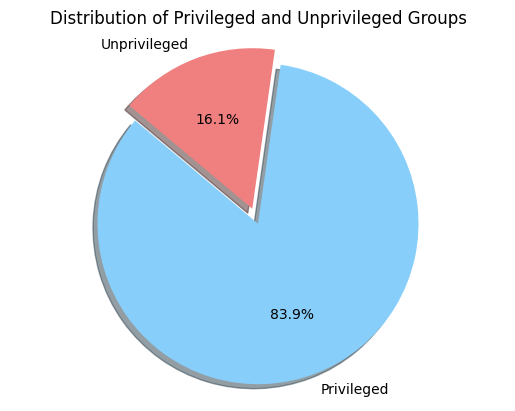

In [11]:
import matplotlib.pyplot as plt

# Count the number of instances in privileged and unprivileged groups
privileged_mask = dataset_orig_train.protected_attributes[:, 0] == 1
unprivileged_mask = ~privileged_mask

num_privileged = sum(privileged_mask)
num_unprivileged = sum(unprivileged_mask)

# Create a pie chart
labels = ['Privileged', 'Unprivileged']
sizes = [num_privileged, num_unprivileged]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Privileged and Unprivileged Groups')
plt.show()



In [12]:
from aif360.algorithms.preprocessing import Reweighing

# Reweighing to mitigate bias
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)

# Transform the original training dataset
dataset_transf_train = RW.fit_transform(dataset_orig_train)


In [13]:
from aif360.metrics import BinaryLabelDatasetMetric
from IPython.display import Markdown, display

# Compute fairness metric on transformed training dataset
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)

# Display fairness metric for the transformed training dataset
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())


#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


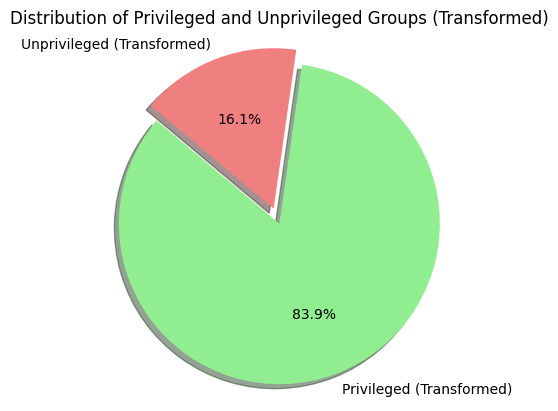

In [14]:
import matplotlib.pyplot as plt

# Count the number of instances in privileged and unprivileged groups for transformed dataset
privileged_mask_transf = dataset_transf_train.protected_attributes[:, 0] == 1
unprivileged_mask_transf = ~privileged_mask_transf

num_privileged_transf = sum(privileged_mask_transf)
num_unprivileged_transf = sum(unprivileged_mask_transf)

# Create a pie chart for the transformed dataset
labels_transf = ['Privileged (Transformed)', 'Unprivileged (Transformed)']
sizes_transf = [num_privileged_transf, num_unprivileged_transf]
colors_transf = ['lightgreen', 'lightcoral']
explode_transf = (0.1, 0)  # explode the 1st slice

plt.pie(sizes_transf, explode=explode_transf, labels=labels_transf, colors=colors_transf, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Distribution of Privileged and Unprivileged Groups (Transformed)')
plt.show()


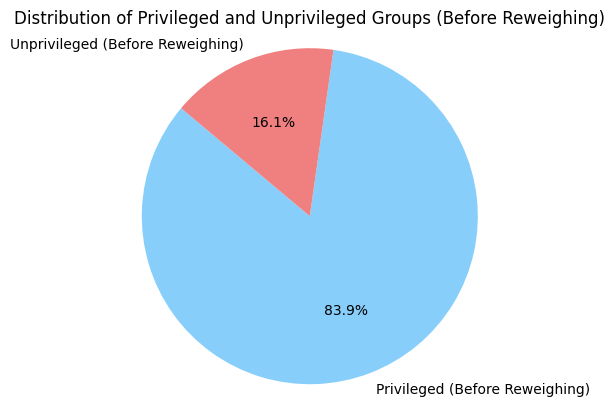

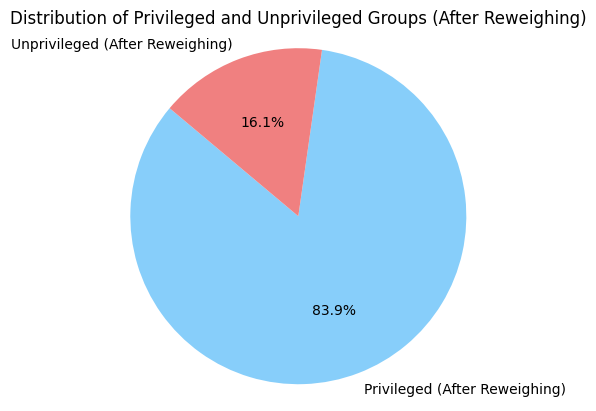

In [15]:
import matplotlib.pyplot as plt
from aif360.algorithms.preprocessing import Reweighing

# Load the dataset and define necessary variables
# ... (your dataset loading code)

# Function to create a pie chart
def create_pie_chart(labels, sizes, title):
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightskyblue', 'lightcoral'])
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.title(title)
    plt.show()

# Calculate the distribution of the sensitive attribute before reweighing
privileged_mask_before = dataset_orig_train.protected_attributes[:, 0] == 1
unprivileged_mask_before = ~privileged_mask_before

num_privileged_before = dataset_orig_train.labels[privileged_mask_before].shape[0]
num_unprivileged_before = dataset_orig_train.labels[unprivileged_mask_before].shape[0]

labels_before = ['Privileged (Before Reweighing)', 'Unprivileged (Before Reweighing)']
sizes_before = [num_privileged_before, num_unprivileged_before]

# Display the pie chart before reweighing
create_pie_chart(labels_before, sizes_before, 'Distribution of Privileged and Unprivileged Groups (Before Reweighing)')

# Apply Reweighing algorithm
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

# Calculate the distribution of the sensitive attribute after reweighing
privileged_mask_after = dataset_transf_train.protected_attributes[:, 0] == 1
unprivileged_mask_after = ~privileged_mask_after

num_privileged_after = dataset_transf_train.labels[privileged_mask_after].shape[0]
num_unprivileged_after = dataset_transf_train.labels[unprivileged_mask_after].shape[0]

labels_after = ['Privileged (After Reweighing)', 'Unprivileged (After Reweighing)']
sizes_after = [num_privileged_after, num_unprivileged_after]

# Display the pie chart after reweighing
create_pie_chart(labels_after, sizes_after, 'Distribution of Privileged and Unprivileged Groups (After Reweighing)')



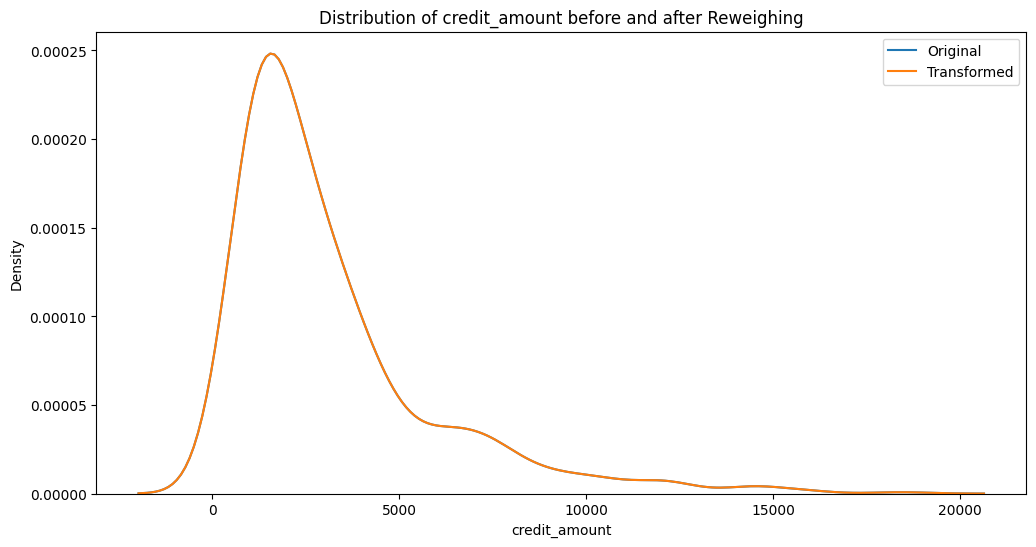

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset_orig_train' and 'dataset_transf_train' are defined
feature_to_plot = 'credit_amount'

# Convert datasets to Pandas DataFrame
df_orig_train, _ = dataset_orig_train.convert_to_dataframe()
df_transf_train, _ = dataset_transf_train.convert_to_dataframe()

plt.figure(figsize=(12, 6))
sns.kdeplot(df_orig_train[feature_to_plot], label='Original')
sns.kdeplot(df_transf_train[feature_to_plot], label='Transformed')
plt.title(f'Distribution of {feature_to_plot} before and after Reweighing')
plt.legend()
plt.show()

